In [31]:
import requests
import pandas as pd


In [32]:
# Lista de URLs de cada chunk
urls = [
    "https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_1.html",
    "https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_2.html",
    "https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_3.html",
    "https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_4.html",
    "https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_5.html",
    "https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_6.html",
    "https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_7.html",
    "https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_8.html",
    "https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_9.html",
    "https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_10.html",
]

# Lista para almacenar cada DataFrame
dataframes = []

for url in urls:
    # Descargar el contenido de cada página
    response = requests.get(url)
    response.raise_for_status()  # Asegura que se descargó correctamente

    # Convertir el contenido HTML a un DataFrame
    tables = pd.read_html(response.text)
    
    # La tabla relevante suele ser la primera en estos archivos
    df = tables[0]  
    dataframes.append(df)

# Concatenar todos los DataFrames en uno solo
geih_raw = pd.concat(dataframes, ignore_index=True)

# Mostrar una muestra de los datos
print(geih_raw.head())

C:\Users\PC\AppData\Local\Temp\ipykernel_15212\172648185.py:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)
C:\Users\PC\AppData\Local\Temp\ipykernel_15212\172648185.py:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)
C:\Users\PC\AppData\Local\Temp\ipykernel_15212\172648185.py:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)
C:\Users\PC\AppData\Local\Temp\ipykernel_15212\172648185.py:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a

   Unnamed: 0  directorio  secuencia_p  orden  clase dominio  mes  estrato1  \
0           1     4514331            1      2      1  BOGOTA    1         2   
1           2     4514331            1      1      1  BOGOTA    1         2   
2           3     4514332            1      4      1  BOGOTA    1         2   
3           4     4514332            1      3      1  BOGOTA    1         2   
4           5     4514332            1      1      1  BOGOTA    1         2   

   sex  age  ...  y_viaticos_m  y_accidentes_m  y_salarySec_m  y_ingLab_m_ha  \
0    0   29  ...           NaN             NaN            NaN            NaN   
1    1   36  ...           NaN             NaN            NaN    8404.320312   
2    1    4  ...           NaN             NaN            NaN            NaN   
3    1    7  ...           NaN             NaN            NaN            NaN   
4    0   32  ...           NaN             NaN            NaN            NaN   

   y_gananciaNeta_m  y_gananciaNetaAgro_m  y

In [33]:
geih_raw #32177 rows × 178 columns

,Unnamed: 0,directorio,secuencia_p,orden,clase,dominio,mes,estrato1,sex,age,...,y_viaticos_m,y_accidentes_m,y_salarySec_m,y_ingLab_m_ha,y_gananciaNeta_m,y_gananciaNetaAgro_m,y_gananciaIndep_m,y_gananciaIndep_m_hu,y_total_m,y_total_m_ha
0,1,4514331,1,2,1,BOGOTA,1,2,0,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4514331,1,1,1,BOGOTA,1,2,1,36,...,NaN,NaN,NaN,8404.320312,NaN,NaN,NaN,NaN,1.620833e+06,8404.320312
2,3,4514332,1,4,1,BOGOTA,1,2,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4514332,1,3,1,BOGOTA,1,2,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,4514332,1,1,1,BOGOTA,1,2,0,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32172,3213,4804454,1,2,1,BOGOTA,12,2,0,24,...,NaN,NaN,NaN,3345.555664,NaN,NaN,NaN,NaN,1.003667e+06,3345.555664
32173,3214,4804455,1,1,1,BOGOTA,12,3,0,36,...,500000.0,NaN,NaN,25958.333984,NaN,NaN,NaN,NaN,6.675000e+06,25958.333984
32174,3215,4804455,1,2,1,BOGOTA,12,3,1,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32175,3216,4804455,1,3,1,BOGOTA,12,3,1,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#Exporto el df a un csv así lo podemos cargar directamente y no scrappear cada vez que queremos usarlo
geih_raw.to_csv("C:\\Users\\Fran\\MAESTRÍA\\Machine Learning\\geih_data.csv", index=False)

In [35]:
# Elimino la primera columna que corresponde al índice de la página web 
geih = geih_raw.drop("Unnamed: 0", axis=1)
geih.shape #(32177, 177)

(32177, 177)

In [36]:
# Filtrar las observaciones donde la columna 'age' es mayor a 17
geih = geih[geih['age'] > 17]

geih.shape #(16277, 177)

(24568, 177)

In [37]:
# ocu	=1 occupied; =0 otherwise
# Filtrar las observaciones donde la columna 'ocu' es igual a 1
geih = geih[geih['ocu'] == 1]

geih.shape #(16542, 177)

(16542, 177)

In [38]:
# Filtro las observaciones donde 'ingtot' es mayor a 0 y no tiene valores missing
geih = geih[(geih['ingtot'] > 0) & (geih['ingtot'].notna())]
geih.shape #(16277, 177)

(16277, 177)

In [39]:
geih.describe()

,directorio,secuencia_p,orden,clase,mes,estrato1,sex,age,p6050,p6090,...,y_viaticos_m,y_accidentes_m,y_salarySec_m,y_ingLab_m_ha,y_gananciaNeta_m,y_gananciaNetaAgro_m,y_gananciaIndep_m,y_gananciaIndep_m_hu,y_total_m,y_total_m_ha
count,1.627700e+04,16277.000000,16277.000000,16277.0,16277.000000,16277.000000,16277.000000,16277.000000,16277.000000,16277.000000,...,3.990000e+02,3.500000e+01,4.590000e+02,9892.000000,4.872000e+03,0.0,4.872000e+03,4872.000000,1.476400e+04,14764.000000
mean,4.656618e+06,1.014499,1.916385,1.0,6.447011,2.555323,0.533391,39.410088,2.197211,1.087424,...,3.096817e+06,4.471214e+05,6.905648e+05,8822.229341,1.357935e+06,NaN,1.357935e+06,8102.233746,1.617551e+06,8541.874328
std,8.190433e+04,0.133616,1.217580,0.0,3.371901,1.013955,0.498899,13.439011,1.785584,0.337924,...,1.031732e+07,7.379406e+05,1.123786e+06,12886.160570,2.466901e+06,NaN,2.466901e+06,15832.598917,2.431319e+06,13866.133412
min,4.514331e+06,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,18.000000,1.000000,1.000000,...,0.000000e+00,0.000000e+00,6.000000e+03,326.666656,8.400000e+01,NaN,8.400000e+01,0.471528,8.400000e+01,0.471528
25%,4.588476e+06,1.000000,1.000000,1.0,4.000000,2.000000,0.000000,28.000000,1.000000,1.000000,...,0.000000e+00,0.000000e+00,1.200000e+05,4226.507812,5.000000e+05,NaN,5.000000e+05,2649.013733,8.000000e+05,3796.527832
50%,4.655277e+06,1.000000,2.000000,1.0,6.000000,2.000000,1.000000,38.000000,2.000000,1.000000,...,6.000000e+05,7.000000e+04,3.000000e+05,5055.555664,8.000000e+05,NaN,8.000000e+05,4148.147949,9.927447e+05,4837.486816
75%,4.728961e+06,1.000000,2.000000,1.0,9.000000,3.000000,1.000000,50.000000,3.000000,1.000000,...,2.000000e+06,5.950000e+05,7.000000e+05,8049.464600,1.500000e+06,NaN,1.500000e+06,7777.777832,1.554042e+06,7899.305664
max,4.804455e+06,4.000000,12.000000,1.0,12.000000,6.000000,1.000000,93.000000,9.000000,9.000000,...,1.300000e+08,3.125000e+06,1.000000e+07,350583.343750,7.000000e+07,NaN,7.000000e+07,340277.781250,7.000000e+07,350583.343750


In [40]:
# Reemplazo valores faltantes o 'NA' en columnas de interés
geih = geih.dropna(subset=['y_total_m_ha', 'age', 'sex', 'clase', 'cotPension', 'totalHoursWorked', 'maxEducLevel', 'microEmpresa', 'sizeFirm', 'p6426', 'relab'])

In [41]:
# Variables predictoras (X)
X = geih[['age', 'sex', 'clase', 'cotPension', 'totalHoursWorked', 'maxEducLevel', 'microEmpresa', 'sizeFirm', 'p6426', 'relab']]

# Variable objetivo (y)
y = geih['y_total_m_ha']

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import numpy as np

# Divido los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Estandarización de las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Especificaciones del modelo
especificaciones = {
    'Modelo Simple': LinearRegression(),
    'Modelo con Interacciones (Grado 2)': PolynomialFeatures(degree=2, interaction_only=True),
    'Modelo Polinómico (Grado 2)': PolynomialFeatures(degree=2),
    'Modelo Polinómico (Grado 3)': PolynomialFeatures(degree=3),
    'Modelo Polinómico (Grado 4)': PolynomialFeatures(degree=4),
    'Modelo con Selección de Variables (age, sex)': ['age', 'sex'],
    'Modelo con Selección de Variables (clase, p6426, sizeFirm)': ['clase', 'p6426', 'sizeFirm'],
    'Modelo con Selección de Variables (cotPension, totalHoursWorked)': ['cotPension', 'totalHoursWorked'],
    'Modelo con Sexo, Edad y Edad al Cuadrado': ['sex', 'age', 'age_squared'], 
    'Regresión Ridge': RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5),  # Mediante validación cruzada obtengo el mejor alpha
    'Regresión Lasso': LassoCV(alphas=np.logspace(-3, 3, 50), cv=5, max_iter=10000),
    'Modelo con Sexo, Edad y Edad al Cuadrado': ['sex', 'age', 'age_squared'],  
    'Modelo Completo': X.columns.tolist() + ['age_squared']  
}

# Diccionario para almacenar los resultados
resultados = {}

# Entreno y evalúo cada especificación
for nombre, especificacion in especificaciones.items():
    if isinstance(especificacion, PolynomialFeatures):  # Modelos con transformaciones polinómicas
        poly = especificacion
        X_train_poly = poly.fit_transform(X_train_scaled)
        X_test_poly = poly.transform(X_test_scaled)
        modelo = LinearRegression()
        modelo.fit(X_train_poly, y_train)
        predicciones = modelo.predict(X_test_poly)
    elif isinstance(especificacion, list):  # Modelos con selección de variables
        if 'age_squared' in especificacion:
            # Agrego la columna derivada `age_squared` temporalmente
            X_train_sel = np.copy(X_train_scaled)
            X_test_sel = np.copy(X_test_scaled)
            age_index = X.columns.get_loc('age')
            X_train_sel = np.column_stack((X_train_sel, X_train_sel[:, age_index] ** 2))
            X_test_sel = np.column_stack((X_test_sel, X_test_sel[:, age_index] ** 2))
            selected_indices = [X.columns.get_loc(col) if col != 'age_squared' else X_train_sel.shape[1] - 1
                                for col in especificacion]
            X_train_sel = X_train_sel[:, selected_indices]
            X_test_sel = X_test_sel[:, selected_indices]
        else:
            selected_indices = [X.columns.get_loc(col) for col in especificacion]
            X_train_sel = X_train_scaled[:, selected_indices]
            X_test_sel = X_test_scaled[:, selected_indices]
        modelo = LinearRegression()
        modelo.fit(X_train_sel, y_train)
        predicciones = modelo.predict(X_test_sel)
    elif isinstance(especificacion, (RidgeCV, LassoCV)):  # Validación cruzada para Ridge y Lasso
        modelo = especificacion
        modelo.fit(X_train_scaled, y_train)
        predicciones = modelo.predict(X_test_scaled)
        print(f"{nombre}: Mejor alpha seleccionado = {modelo.alpha_}")  # Imprimir el alpha que se usará en Ridge y en Lasso
    else:  # Modelos estándar (simple y completo)
        if nombre == 'Modelo Completo':
            # Agrego `age_squared` al modelo completo
            X_train_comp = np.copy(X_train_scaled)
            X_test_comp = np.copy(X_test_scaled)
            age_index = X.columns.get_loc('age')
            X_train_comp = np.column_stack((X_train_comp, X_train_comp[:, age_index] ** 2))
            X_test_comp = np.column_stack((X_test_comp, X_test_comp[:, age_index] ** 2))
            modelo = especificacion
            modelo.fit(X_train_comp, y_train)
            predicciones = modelo.predict(X_test_comp)
        else:
            modelo = especificacion
            modelo.fit(X_train_scaled, y_train)
            predicciones = modelo.predict(X_test_scaled)

    # Calculo el RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predicciones))
    resultados[nombre] = rmse

# Muestro los resultados
for nombre, rmse in resultados.items():
    print(f'{nombre}: RMSE = {rmse}')


Regresión Ridge: Mejor alpha seleccionado = 104.81131341546853
Regresión Lasso: Mejor alpha seleccionado = 0.001
Modelo Simple: RMSE = 11571.671242666433
Modelo con Interacciones (Grado 2): RMSE = 11369.86156691949
Modelo Polinómico (Grado 2): RMSE = 11160.294899893031
Modelo Polinómico (Grado 3): RMSE = 11134.047258261788
Modelo Polinómico (Grado 4): RMSE = 13161.508974557204
Modelo con Selección de Variables (age, sex): RMSE = 12522.820266386338
Modelo con Selección de Variables (clase, p6426, sizeFirm): RMSE = 12225.751980301715
Modelo con Selección de Variables (cotPension, totalHoursWorked): RMSE = 12219.614619295262
Modelo con Sexo, Edad y Edad al Cuadrado: RMSE = 12493.940635335348
Regresión Ridge: RMSE = 11567.460205761095
Regresión Lasso: RMSE = 11571.671049781125
Modelo Completo: RMSE = 11555.432349788196


In [ ]:

# Genero características polinómicas
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Entreno el modelo
modelo_polinomico = LinearRegression()
modelo_polinomico.fit(X_train_poly, y_train)

# Predicciones
predicciones_polinomico = modelo_polinomico.predict(X_test_poly)


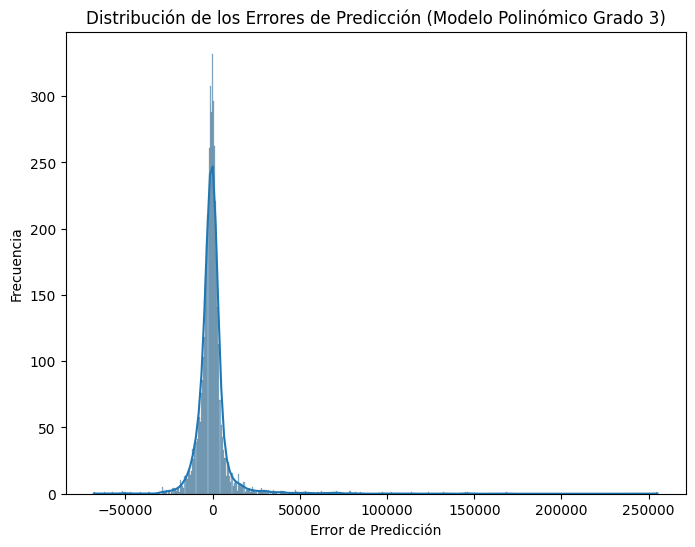

Errores extremos encontrados (Modelo Polinómico Grado 3): 128
Resumen de los errores extremos:
count       128.000000
mean      29603.130119
std       49113.299480
min      -68156.545227
25%      -22336.816162
50%       30559.029297
75%       52174.890625
max      255055.087891
Name: y_total_m_ha, dtype: float64
25500     35128.779297
19725     97338.958984
15469     36355.404297
5067     -26352.750000
2501     132609.162109
             ...      
18891    123563.064453
5175      30038.072266
11628     24049.419922
12806     40159.369141
4723      81925.103516
Name: y_total_m_ha, Length: 128, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cálculo de los errores de predicción
errores_prediccion = y_test - predicciones_polinomico

# Histograma de los errores
plt.figure(figsize=(8, 6))
sns.histplot(errores_prediccion, kde=True)
plt.title('Distribución de los Errores de Predicción (Modelo Polinómico Grado 3)')
plt.xlabel('Error de Predicción')
plt.ylabel('Frecuencia')
plt.show()

# Verifico los errores más grandes y más pequeños
errores_extremos = errores_prediccion[np.abs(errores_prediccion) > 2 * np.std(errores_prediccion)]
print(f"Errores extremos encontrados (Modelo Polinómico Grado 3): {len(errores_extremos)}")
print("Resumen de los errores extremos:")
print(pd.Series(errores_extremos).describe())
print(errores_extremos)


In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.pipeline import make_pipeline
from joblib import Parallel, delayed


# Tomo un subconjunto de 3000 observaciones aleatorias (para agilizar el código)
X_train_subset = X_train.sample(n=3000, random_state=123)
y_train_subset = y_train[X_train_subset.index]

# Defino los modelos con menor error de predicción
modelos_loocv = {
    'Modelo Polinómico (Grado 3)': make_pipeline(StandardScaler(), PolynomialFeatures(degree=3), LinearRegression()),
    'Modelo Polinómico (Grado 2)': make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())
}

# Diccionario para almacenar los errores de LOOCV
errores_loocv = {}

# Función para calcular el RMSE de cada iteración LOOCV
def calcular_rmse_loo(modelo, X_train_loo, y_train_loo, X_test_loo, y_test_loo):
    modelo.fit(X_train_loo, y_train_loo)  
    prediccion_loo = modelo.predict(X_test_loo)  
    return np.sqrt(mean_squared_error(y_test_loo, prediccion_loo)) 

# Bucle para realizar LOOCV para cada modelo
for nombre, modelo in modelos_loocv.items():
    loo = LeaveOneOut()
    
    # Paralelización del cálculo de LOOCV
    resultados = Parallel(n_jobs=-1)(
        delayed(calcular_rmse_loo)(
            modelo, 
            X_train_subset.iloc[train_index].values,  
            y_train_subset.iloc[train_index].values, 
            X_train_subset.iloc[test_index].values.reshape(1, -1), 
            y_train_subset.iloc[test_index].values
        )
        for train_index, test_index in loo.split(X_train_subset)
    )

    # Almaceno el RMSE promedio de LOOCV
    errores_loocv[nombre] = np.mean(resultados)

# Muestro los resultados de LOOCV
for nombre, rmse_loocv in errores_loocv.items():
    print(f'{nombre} - LOOCV RMSE: {rmse_loocv}')



Modelo Polinómico (Grado 3) - LOOCV RMSE: 5578.775472599666
Modelo Polinómico (Grado 2) - LOOCV RMSE: 5315.535480694135
